<a href="https://colab.research.google.com/github/MuskaansGithup/CodSoft_2/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING OF DATASET



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


MISSING VALUE

In [ ]:
missing=df.isnull()
for column in df:
  print(missing[column].value_counts())
  print(" ")

TV
False    200
Name: count, dtype: int64
 
Radio
False    200
Name: count, dtype: int64
 
Newspaper
False    200
Name: count, dtype: int64
 
Sales
False    200
Name: count, dtype: int64
 


DETECTING OUTLIERS

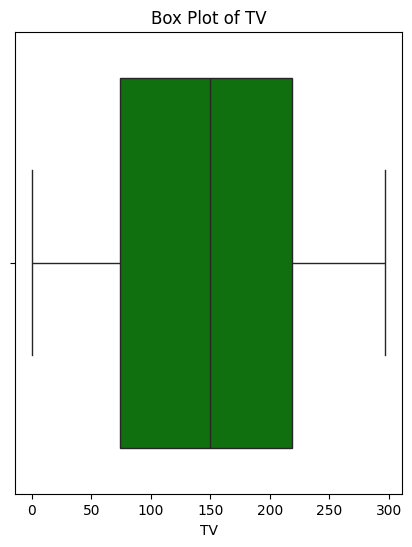

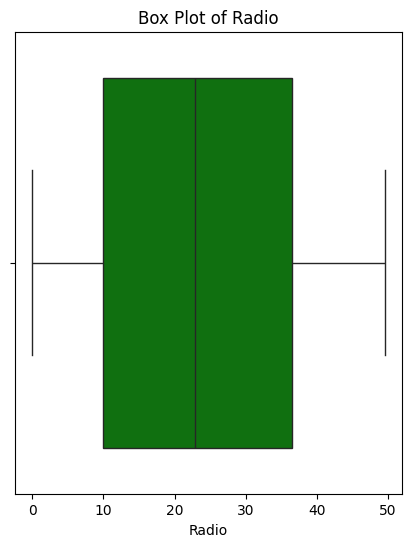

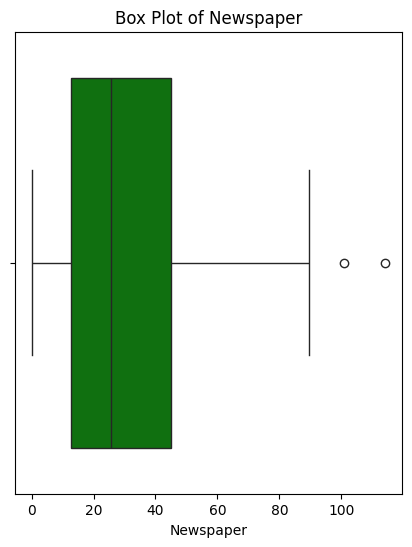

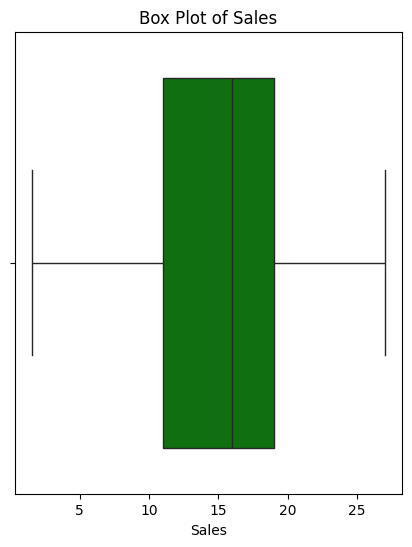

In [ ]:
for i in ['TV','Radio','Newspaper','Sales']:
    plt.figure(figsize=(5,6))
    sns.boxplot(x=df[i] , color='green')
    plt.title(f'Box Plot of {i}')
    plt.xlabel(i)
    plt.show()

HANDLING OUTLIERS

In [ ]:
# Detecting outliers
upper_limit = df['Newspaper'].mean() + 3*df['Newspaper'].std()
lower_limit = df['Newspaper'].mean() - 3*df['Newspaper'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 95.88986251556847
lower limit: -34.781862515568484


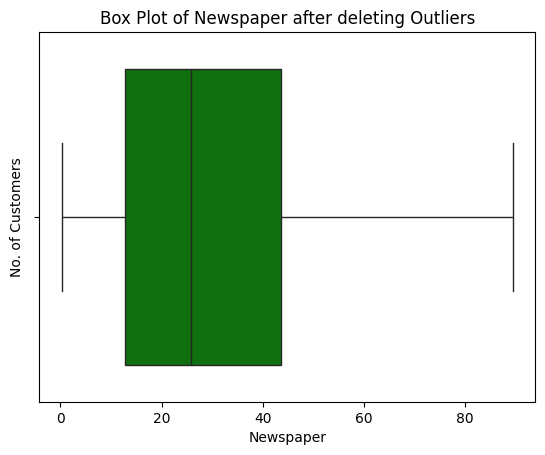

In [ ]:
# capping - change the outlier values with the mean
mean = df['Newspaper'].mean()

# Use a boolean array to select rows where 'Newspaper' values are outliers
df.loc[(df['Newspaper'] > upper_limit) | (df['Newspaper'] < lower_limit), 'Newspaper'] = mean

#Plot
sns.boxplot(x=df['Newspaper'], color='green')
plt.title('Box Plot of Newspaper after deleting Outliers')
plt.xlabel('Newspaper')
plt.ylabel('No. of Customers')
plt.show()

FEATURE CREATION

In [ ]:
df['TV_Radio'] = df['TV'] * df['Radio']
df['TV_Newspaper'] = df['TV'] * df['Newspaper']
df['Radio_Newspaper'] = df['Radio'] * df['Newspaper']
df.head()

,TV,Radio,Newspaper,Sales,TV_Radio,TV_Newspaper,Radio_Newspaper
0,230.1,37.8,69.2,22.1,8697.78,15922.92,2615.76
1,44.5,39.3,45.1,10.4,1748.85,2006.95,1772.43
2,17.2,45.9,69.3,12.0,789.48,1191.96,3180.87
3,151.5,41.3,58.5,16.5,6256.95,8862.75,2416.05
4,180.8,10.8,58.4,17.9,1952.64,10558.72,630.72


EXPLORARORY DATA ANALYSIS

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales,TV_Radio,TV_Newspaper,Radio_Newspaper
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,29.785040,15.130500,3490.309900,4465.585434,796.694333
std,85.854236,14.846809,20.343446,5.283892,3360.740127,4535.436120,884.741470
min,0.700000,0.000000,0.300000,1.600000,0.000000,6.090000,0.000000
25%,74.375000,9.975000,12.750000,11.000000,773.445000,1119.747500,147.937500
50%,149.750000,22.900000,25.750000,16.000000,2069.065000,2800.730000,416.115000
75%,218.825000,36.525000,43.550000,19.050000,5516.197500,6463.812500,1226.150000
max,296.400000,49.600000,89.400000,27.000000,13540.410000,20649.680000,3906.780000


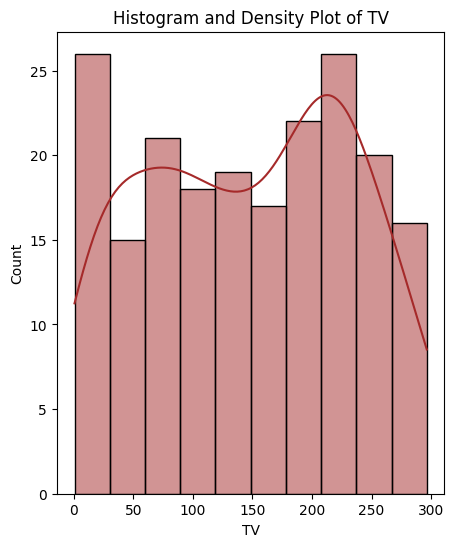

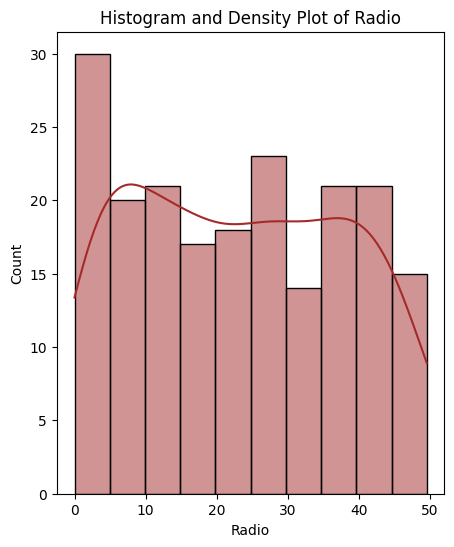

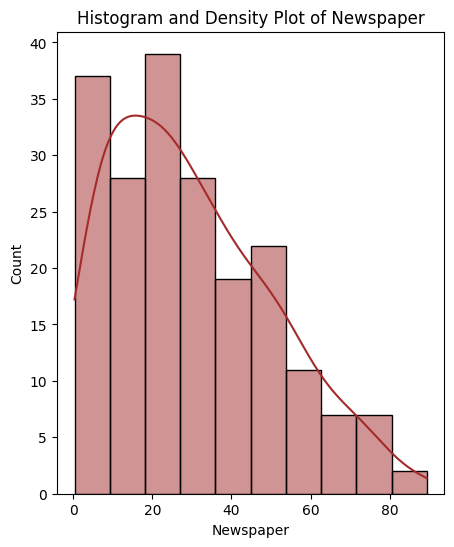

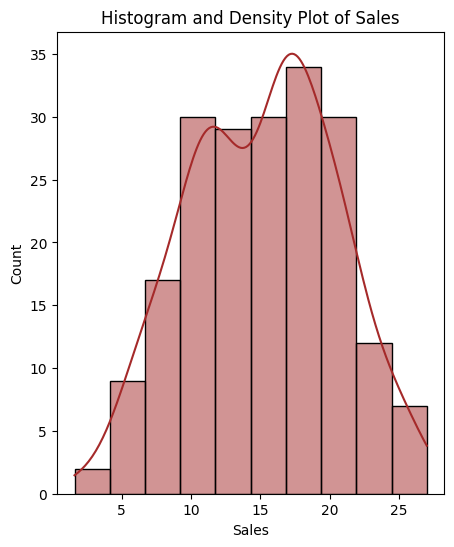

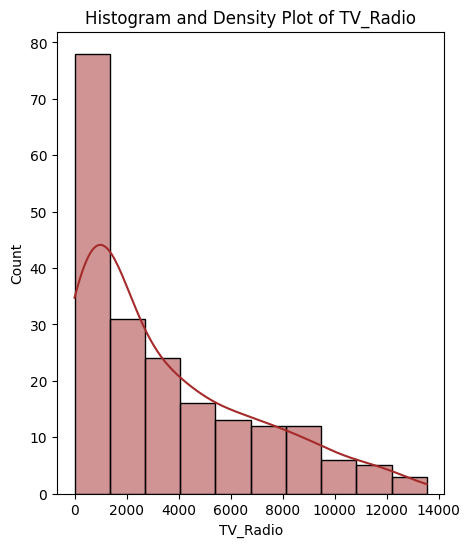

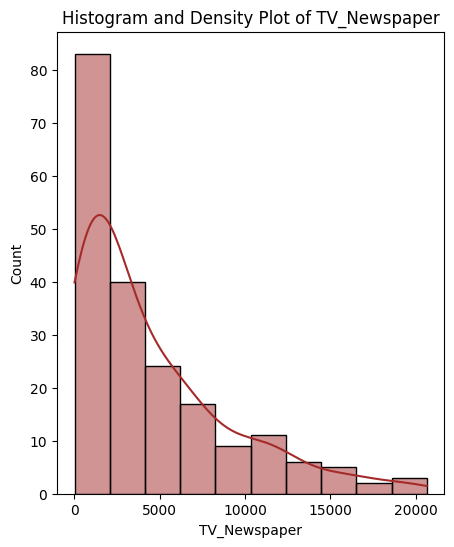

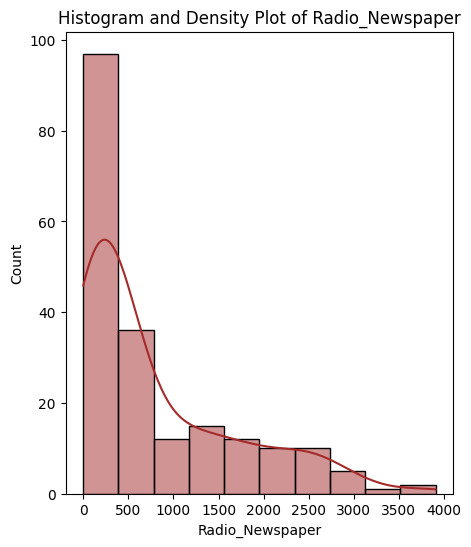

In [ ]:
# Histogram
import seaborn as sns
import matplotlib.pyplot as plt
for x in df:
    plt.figure(figsize=(5,6))
    sns.histplot(df[x], kde=True, bins=10,color='brown')
    plt.title(f'Histogram and Density Plot of {x}')
    plt.xlabel(x)
    plt.show()

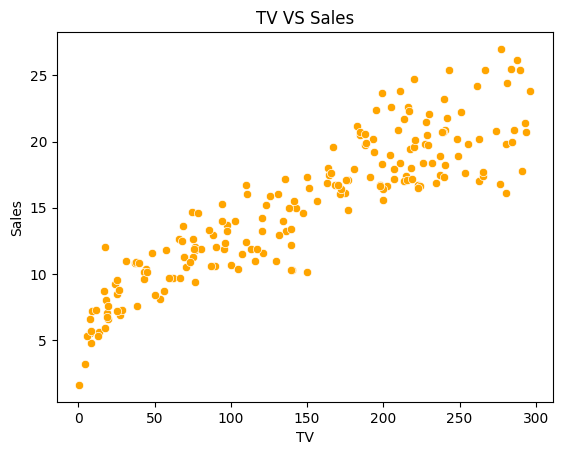

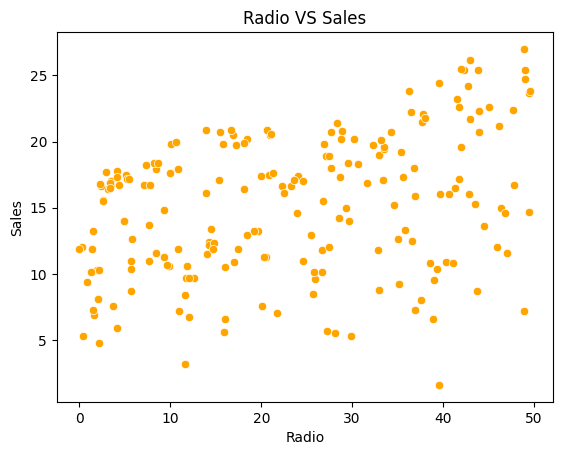

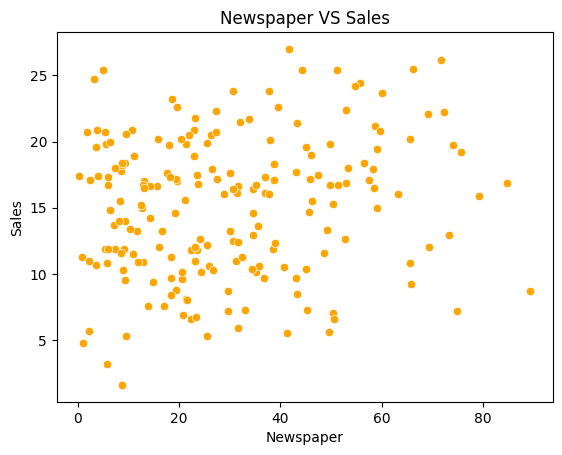

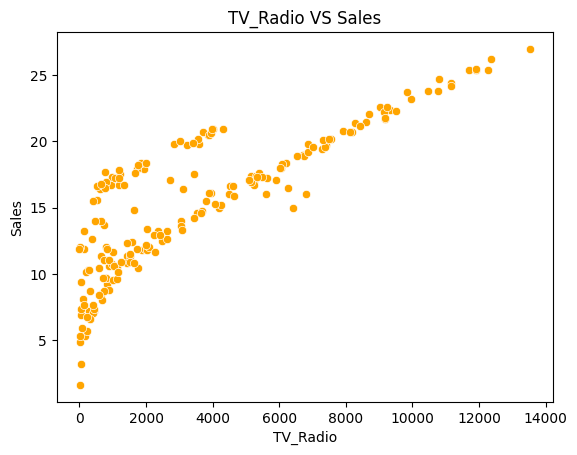

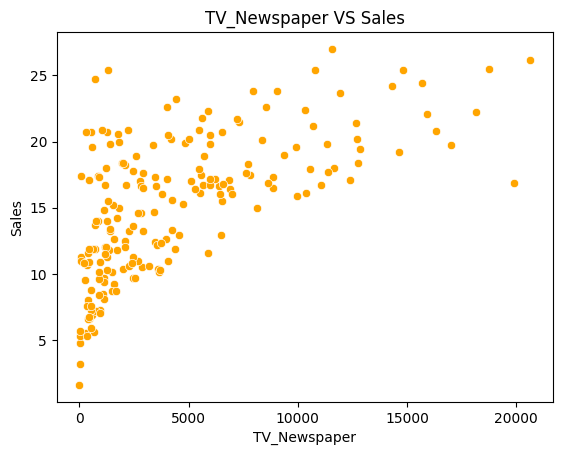

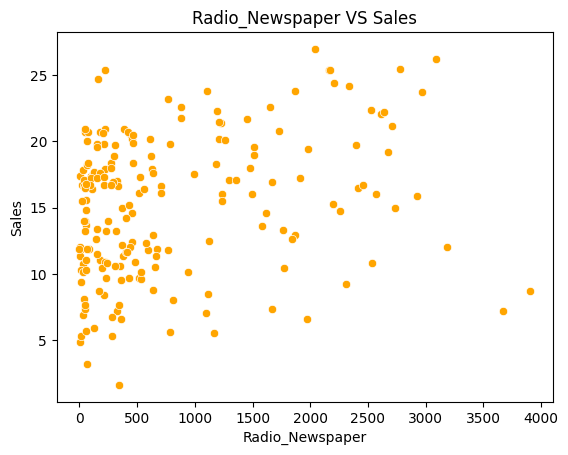

In [ ]:
for x in ['TV','Radio','Newspaper','TV_Radio','TV_Newspaper','Radio_Newspaper']:
  sns.scatterplot(x=df[x],y=df['Sales'],color="orange")
  plt.title(f"{x} VS Sales")
  plt.xlabel(x)
  plt.ylabel('Sales')
  plt.show()

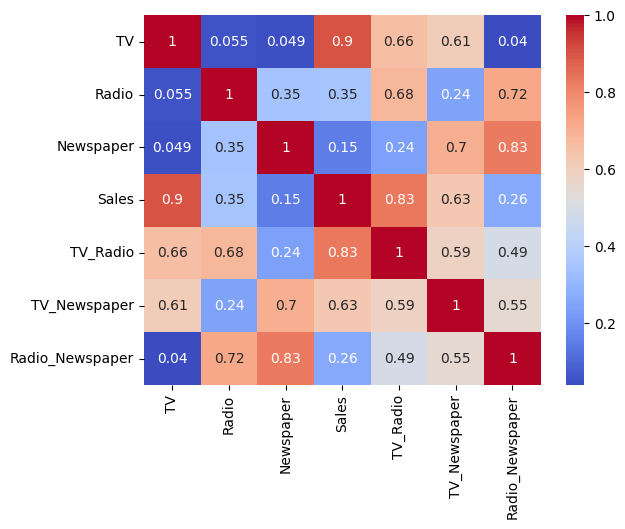

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

STANDARIZATION OF VARIABLES

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
df1= pd.DataFrame(scaled, columns = df.columns)
df1.head()

,TV,Radio,Newspaper,Sales,TV_Radio,TV_Newspaper,Radio_Newspaper
0,0.969852,0.981522,1.942339,1.322319,1.553389,2.532521,2.061202
1,-1.197376,1.082808,0.754709,-0.897515,-0.519478,-0.543455,1.105616
2,-1.516155,1.528463,1.947267,-0.593948,-0.805658,-0.723600,2.701533
3,0.052050,1.217855,1.415051,0.259834,0.825289,0.971946,1.834908
4,0.394182,-0.841614,1.410123,0.525455,-0.458687,1.346822,-0.188067


In [ ]:
# SPLITING THE DATASET
X= df1.drop(['Sales'],axis=1)
y = df1['Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

APPLING VARIOUS MODELS

In [ ]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Extended Gradient Boosting': XGBRegressor(n_estimators=100, random_state=1)
}

MODEL EVALUATION

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)*100
    mse = mean_squared_error(y_test, y_pred)
    cv_scores_r2 = cross_val_score(model, X, y, cv=5,scoring='r2')*100
    cv_scores_mse = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

    print(f"Model: {model_name}")
    print(f"R-squared = {r2:.2f}%")
    print(f"Mean Squared Error = {mse:.2f}")
    print(f"Cross-validated R-squared = {cv_scores_r2.mean():.2f}%")
    print(f"Cross-validated MSE = {cv_scores_mse.mean():.2f}\n")

# Evaluate each model
for model_name, model in models.items():
  evaluate_model(model, X_train, y_train, X_test, y_test, model_name)

Model: Linear Regression
R-squared = 88.38%
Mean Squared Error = 0.13
Cross-validated R-squared = 89.91%
Cross-validated MSE = 0.10

Model: Random Forest
R-squared = 94.05%
Mean Squared Error = 0.06
Cross-validated R-squared = 95.42%
Cross-validated MSE = 0.04

Model: Decision Tree
R-squared = 92.44%
Mean Squared Error = 0.08
Cross-validated R-squared = 93.48%
Cross-validated MSE = 0.06

Model: Gradient Boosting
R-squared = 93.73%
Mean Squared Error = 0.07
Cross-validated R-squared = 94.66%
Cross-validated MSE = 0.05

Model: Extended Gradient Boosting
R-squared = 92.66%
Mean Squared Error = 0.08
Cross-validated R-squared = 95.06%
Cross-validated MSE = 0.05



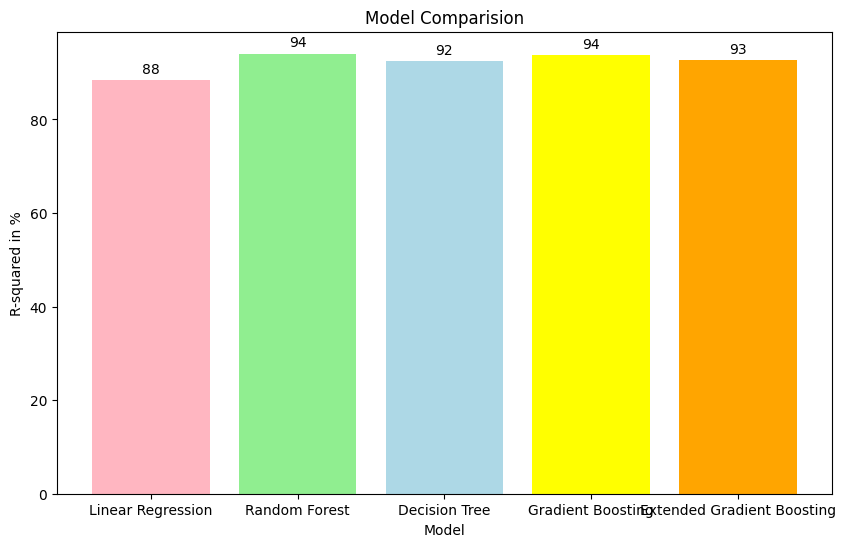

In [ ]:
plt.figure(figsize=(10, 6))
plot = plt.bar(r2_scores.keys(), r2_scores.values(), color=['lightpink', 'lightgreen','lightblue','yellow','orange'])
plt.xlabel('Model')
plt.ylabel('R-squared in %')
plt.title('Model Comparision')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 8),
                textcoords = 'offset points')
plt.show()